**Section 1:** 

Download, Encode and Split the Penn Treebank dataset.

In [863]:
import sys
import shutil
import urllib

import zipfile
from pathlib import Path
import requests

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from typing import Iterable, List, Callable, Dict
from tqdm import tqdm

In [864]:
class DownloadProgressBar(tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)

def download_dataset(download_path: Path, url: str):
    response = requests.get(url)
    with open(download_path, 'wb') as f:
        f.write(response.content)

def download_url(download_path: Path, url: str):
    print("Downloading dataset...")
    download_url(url=url, download_path=download_path)
    print("Download complete!")

def extract_dataset(download_path: Path, extract_path: Path):
    print("Extracting dataset... (it may take a while...)")
    with zipfile.ZipFile(download_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Extraction completed!")

In [865]:
url = "https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip"
dataset_name = "dependency_treebank"

print(f"Current work directory: {Path.cwd()}")
dataset_folder = Path.cwd().joinpath("Datasets")

if not dataset_folder.exists():
    dataset_folder.mkdir(parents=True)

dataset_zip_path = dataset_folder.joinpath("dependency_treebank.zip")
dataset_path = dataset_folder.joinpath(dataset_name)

if not dataset_zip_path.exists():
    download_dataset(dataset_zip_path, url)

if not dataset_path.exists():
    extract_dataset(dataset_zip_path, dataset_folder)

Current work directory: /Users/antoniospantelis/Desktop/Assignment 1


In [866]:
file_path = dataset_folder.joinpath(dataset_name, "wsj_0199.dp")

if file_path.is_file():
        with file_path.open(mode='r', encoding='utf-8') as text_file:
            text = text_file.read()
            print(text)

Trinity	NNP	3
Industries	NNPS	3
Inc.	NNP	4
said	VBD	0
it	PRP	6
reached	VBD	4
a	DT	9
preliminary	JJ	9
agreement	NN	6
to	TO	11
sell	VB	9
500	CD	14
railcar	NN	14
platforms	NNS	11
to	TO	11
Trailer	NNP	18
Train	NNP	18
Co.	NNP	15
of	IN	18
Chicago	NNP	19
.	.	4

Terms	NNS	2
were	VBD	0
n't	RB	2
disclosed	VBN	2
.	.	2

Trinity	NNP	2
said	VBD	0
it	PRP	4
plans	VBZ	2
to	TO	6
begin	VB	4
delivery	NN	6
in	IN	6
the	DT	11
first	JJ	11
quarter	NN	8
of	IN	11
next	JJ	14
year	NN	12
.	.	2



In [867]:
folder = dataset_folder.joinpath(dataset_name)

# Initialize an empty list to store the data rows
dataframe_rows = []

# Iterate through the files in the directory with the '.dp' extension
for file_path in folder.glob('*.dp'):
    with file_path.open(mode='r', encoding='latin1') as text_file:
        for line in text_file:
            # Split the line by whitespace to separate columns
            columns = line.strip().split()
            if len(columns) >= 2:
                word, pos = columns[:2]  # Extract the first two columns (Word and POS)
                dataframe_row = {
                    "Word": word,
                    "POS": pos
                }
                dataframe_rows.append(dataframe_row)

# Create a Pandas DataFrame
df = pd.DataFrame(dataframe_rows)

In [868]:
folder = Path.cwd().joinpath("Datasets", "Dataframes", dataset_name)
if not folder.exists():
    folder.mkdir(parents=True)

df = pd.DataFrame(dataframe_rows)
df = df[["Word", 
         "POS"]
      ]
df_path = folder.with_name(dataset_name + ".pkl")
df.to_pickle(df_path)

In [869]:
# Define the path to the directory containing the files
folder = dataset_folder.joinpath(dataset_name)

# Create directories for train, valid, and test sets
dataframes_folder = Path.cwd().joinpath("Datasets", "Dataframes", dataset_name)
train_folder = dataframes_folder.joinpath("train")
valid_folder = dataframes_folder.joinpath("valid")
test_folder = dataframes_folder.joinpath("test")

# Ensure that the directories exist, creating them if necessary
train_folder.mkdir(parents=True, exist_ok=True)
valid_folder.mkdir(parents=True, exist_ok=True)
test_folder.mkdir(parents=True, exist_ok=True)

In [870]:
train_data, valid_data, test_data = [], [], []

# Iterate through the files in the directory with the '.dp' extension
for file_path in folder.glob('*.dp'):
    file_name = file_path.stem  # Get the file name without the extension

    with file_path.open(mode='r', encoding='utf-8') as text_file:
        for line in text_file:
            columns = line.strip().split()  # Split the line by whitespace to separate columns
            if len(columns) >= 2:
                word, tag = columns[:2]  # Extract first 2 columns (Word & POS)
                dataframe_row = {
                    "Word": word,
                    "POS": tag
                }

                # Determine which set the file should belong to based on its name
                if int(file_name.split("_")[1]) <= 100:
                    train_data.append(dataframe_row)
                elif 100 < int(file_name.split("_")[1]) <= 150:
                    valid_data.append(dataframe_row)
                else:
                    test_data.append(dataframe_row)

# Create DataFrames for each set
train_df = pd.DataFrame(train_data)
valid_df = pd.DataFrame(valid_data)
test_df = pd.DataFrame(test_data)

# Save DataFrames to respective folders
train_df.to_pickle(train_folder.joinpath(f"{dataset_name}_train.pkl"))
valid_df.to_pickle(valid_folder.joinpath(f"{dataset_name}_valid.pkl"))
test_df.to_pickle(test_folder.joinpath(f"{dataset_name}_test.pkl"))

In [871]:
# Add the "Split" column to each of the DataFrames
train_df["Split"] = "train"
valid_df["Split"] = "valid"
test_df["Split"] = "test"

# Concatenate the DataFrames into one DataFrame
df = pd.concat([train_df, valid_df, test_df], ignore_index=True)

In [872]:
print("Distribution of words: ")
print(df['Word'].value_counts())
print()

Distribution of words: 
Word
,                     4885
the                   4045
.                     3828
of                    2319
to                    2164
                      ... 
recession-inspired       1
inherited                1
engineered               1
photographic             1
microprocessors          1
Name: count, Length: 11968, dtype: int64



In [873]:
print("Distribution of POS: ")
print(df['POS'].value_counts())
print()

Distribution of POS: 
POS
NN       13166
IN        9857
NNP       9410
DT        8165
NNS       6047
JJ        5834
,         4886
.         3874
CD        3546
VBD       3043
RB        2822
VB        2554
CC        2265
TO        2179
VBN       2134
VBZ       2125
PRP       1716
VBG       1460
VBP       1321
MD         927
POS        824
PRP$       766
$          724
``         712
''         694
:          563
WDT        445
JJR        381
NNPS       244
WP         241
RP         216
JJS        182
WRB        178
RBR        136
-RRB-      126
-LRB-      120
EX          88
RBS         35
PDT         27
#           16
WP$         14
LS          13
FW           4
UH           3
SYM          1
Name: count, dtype: int64



In [874]:
print("Distribution of Splits: ")
print(df['Split'].value_counts())
print()

Distribution of Splits: 
Split
train    47356
valid    31183
test     15545
Name: count, dtype: int64



In [875]:
print("Distribution of Words in split: ")
print(df.groupby(['Split','Word']).size())
print()

Distribution of Words in split: 
Split  Word              
test   $                     208
       %                      78
       &                      13
       '                       9
       ''                     69
                            ... 
valid  your                   11
       yourself                2
       yttrium-containing      1
       zero                    1
       zip                     1
Length: 17524, dtype: int64



In [876]:
print("Distribution of POS in split:")
print(df.groupby(['Split','POS']).size())
print()

Distribution of POS in split:
Split  POS  
test   $        209
       ''        70
       ,        787
       -LRB-     18
       -RRB-     18
               ... 
valid  WDT      157
       WP        80
       WP$        4
       WRB       62
       ``       230
Length: 129, dtype: int64



In [877]:
print("Differences among POS tags in the splits: ")
print(df.groupby(['Word','POS','Split']).size())
print()

Differences among POS tags in the splits: 
Word    POS  Split
!       .    train      3
             valid      3
#       #    train      1
             valid     15
$       $    test     208
                     ... 
zero    CD   valid      1
zinc    NN   test       1
zip     VB   valid      1
zone    NN   train      2
zoomed  VBN  train      1
Length: 19108, dtype: int64



**Section 2:**

Visualization and some first information on the data set.

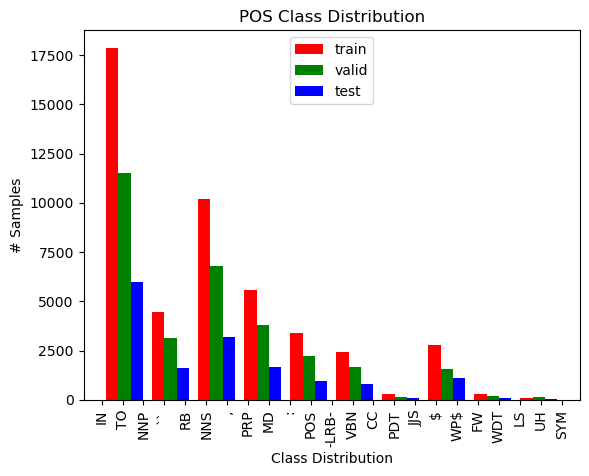

In [878]:
train_pos = df[df.Split == 'train'].POS.values
valid_pos = df[df.Split == 'valid'].POS.values
test_pos = df[df.Split == 'test'].POS.values

plt.hist([train_pos, valid_pos, test_pos], bins=10, label=['train', 'valid', 'test'], color=["red", "green", "blue"], align="mid")
plt.legend(loc='upper center')
plt.title('POS Class Distribution')
plt.xlabel('Class Distribution')
plt.ylabel('# Samples')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
plt.show()

In [879]:
from collections import Counter
train_word = df[df.Split == 'train'].Word.values
valid_word = df[df.Split == 'valid'].Word.values
test_word = df[df.Split == 'test'].Word.values


train_word_counts = Counter(train_word)
valid_word_counts = Counter(valid_word)
test_word_counts = Counter(test_word)

N = 20

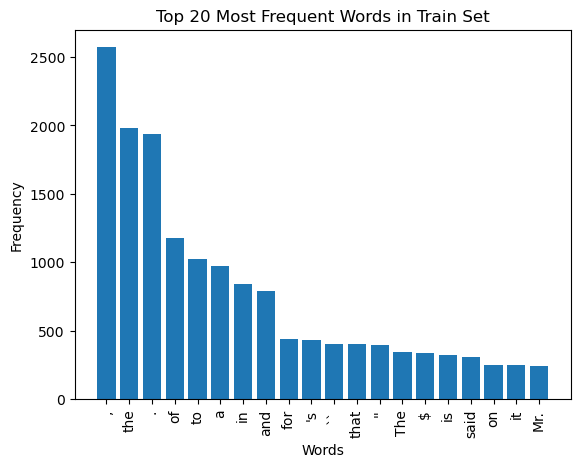

In [880]:
top_words_train = [word for word, _ in train_word_counts.most_common(N)]
word_counts_train = [train_word_counts[word] for word in top_words_train]

plt.bar(top_words_train, word_counts_train)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words in Train Set'.format(N))
plt.show()

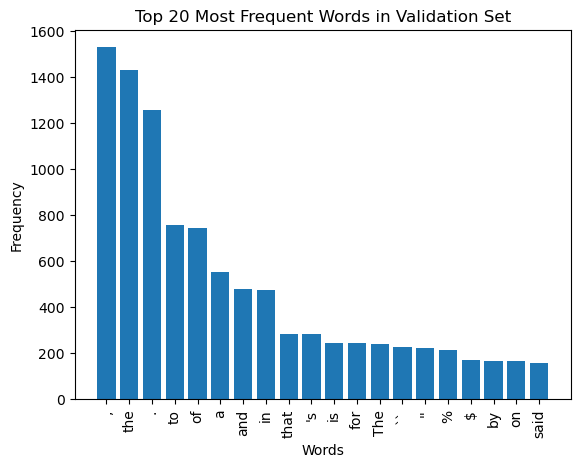

In [881]:
top_words_valid = [word for word, _ in valid_word_counts.most_common(N)]
word_counts_valid = [valid_word_counts[word] for word in top_words_valid]

plt.bar(top_words_valid, word_counts_valid)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words in Validation Set'.format(N))
plt.show()

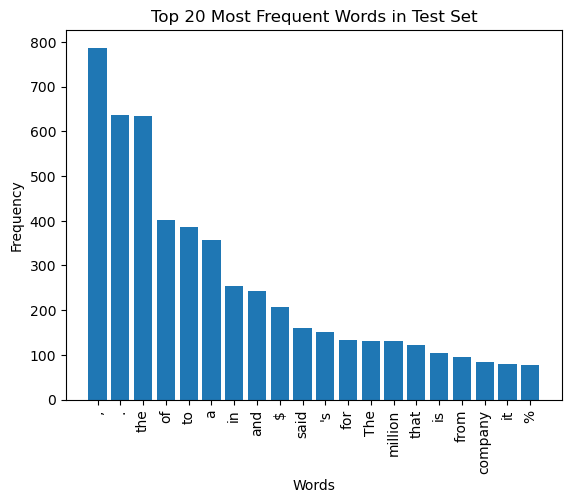

In [882]:
top_words_test = [word for word, _ in test_word_counts.most_common(N)]
word_counts_test = [test_word_counts[word] for word in top_words_test]

plt.bar(top_words_test, word_counts_test)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words in Test Set'.format(N))
plt.show()

**Section 3:**

Text pre-processing, Lemmatization, (Stemming ?)

In [883]:
import re
from functools import reduce
import nltk
from nltk.corpus import stopwords

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@]') #  all non-punctuation symbols are set to whites
GOOD_SYMBOLS_RE = re.compile('[^0-9a-z]') # all non-alphanumeric symbols set to empty string
try:
    STOPWORDS = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    STOPWORDS = set(stopwords.words('english'))

In [884]:
def lower(text: str) -> str:
    return text.lower() # lower casing words

# def replace_br(text: str) -> str: # replace line breaks 
#    return text.replace('br', '')

In [885]:
def filter_out_uncommon_symbols(text: str) -> str: # remove all non-alphanumeric symbols
    return GOOD_SYMBOLS_RE.sub('', text)

def remove_stopwords(text: str) -> str: # remove stopwords
    return ' '.join([x for x in text.split() if x and x not in STOPWORDS])

def strip_text(text: str) -> str: # removes white spacing and carriage returns 
    return text.strip()

In [886]:
PREPROCESSING_PIPELINE = [
                          lower,
                          # replace_br,
                          filter_out_uncommon_symbols,
                          remove_stopwords,
                          strip_text
                          ]

def text_prepare(text: str,
                 filter_methods: List[Callable[[str], str]] = None) -> str:
    
    filter_methods = filter_methods if filter_methods is not None else PREPROCESSING_PIPELINE
    return reduce(lambda txt, f: f(txt), filter_methods, text)

In [887]:
print('Pre-processing text...')

df['Word'] = df['Word'].apply(lambda txt: text_prepare(txt))

print("Pre-processing completed!")

Pre-processing text...
Pre-processing completed!


In [888]:
print(df)

            Word   POS  Split
0                   IN  train
1      reference    NN  train
2                   TO  train
3                 PRP$  train
4            oct   NNP  train
...          ...   ...    ...
94079       chip    NN   test
94080     prices   NNS   test
94081              VBP   test
94082     fallen   VBN   test
94083                .   test

[94084 rows x 3 columns]


**Section 4**

Vocabulary Creation

In [889]:
from collections import OrderedDict
def build_vocabulary(df: pd.DataFrame) -> (Dict[int, str], 
                                           Dict[str, int],
                                           List[str]): # builds the vocabulary of the dataset

    idx_to_word = OrderedDict() # vocabulary index to word map
    word_to_idx = OrderedDict() # word to vocabulary index map (inverse of idx_to_word)

    curr_idx = 0
    for sentence in tqdm(df.Word.values):
        tokens = sentence.split()
        for token in tokens:
            if token not in word_to_idx:
                word_to_idx[token] = curr_idx
                idx_to_word[curr_idx] = token
                curr_idx += 1

    word_listing = list(idx_to_word.values()) # set of unique terms that make up the vocabulary
    return idx_to_word, word_to_idx, word_listing

In [890]:
idx_to_word, word_to_idx, word_listing = build_vocabulary(df)
print(f'[Debug] Index -> Word vocabulary size: {len(idx_to_word)}')
print(f'[Debug] Word -> Index vocabulary size: {len(word_to_idx)}')
print(f'[Debug] Some words: {[(idx_to_word[idx], idx) for idx in np.arange(10) + 1]}')

100%|██████████| 94084/94084 [00:00<00:00, 5530487.82it/s]

[Debug] Index -> Word vocabulary size: 10606
[Debug] Word -> Index vocabulary size: 10606
[Debug] Some words: [('oct', 1), ('9', 2), ('pageone', 3), ('article', 4), ('barbara', 5), ('bush', 6), ('earns', 7), ('even', 8), ('higher', 9), ('ratings', 10)]


In [891]:
# Check size, content, consistency and toy example
def evaluate_vocabulary(idx_to_word: Dict[int, str], word_to_idx: Dict[str, int],
                        word_listing: List[str], df: pd.DataFrame, check_default_size: bool = False):
    print("[Vocabulary Evaluation] Size checking...")
    assert len(idx_to_word) == len(word_to_idx)
    assert len(idx_to_word) == len(word_listing)

    print("[Vocabulary Evaluation] Content checking...")
    for i in tqdm(range(0, len(idx_to_word))):
        assert idx_to_word[i] in word_to_idx
        assert word_to_idx[idx_to_word[i]] == i

    print("[Vocabulary Evaluation] Consistency checking...")
    _, _, first_word_listing = build_vocabulary(df)
    _, _, second_word_listing = build_vocabulary(df)
    assert first_word_listing == second_word_listing

    print("[Vocabulary Evaluation] Toy example checking...")
    toy_df = pd.DataFrame.from_dict({
        'Word': ["all that glitters is not gold", "all in all i like this assignment"]
    })
    _, _, toy_word_listing = build_vocabulary(toy_df)
    toy_valid_vocabulary = set(' '.join(toy_df.Word.values).split())
    assert set(toy_word_listing) == toy_valid_vocabulary

In [892]:
print("Vocabulary evaluation...")
evaluate_vocabulary(idx_to_word, word_to_idx, word_listing, df)
print("Evaluation completed!")

Vocabulary evaluation...
[Vocabulary Evaluation] Size checking...
[Vocabulary Evaluation] Content checking...


100%|██████████| 10606/10606 [00:00<00:00, 5735532.26it/s]


[Vocabulary Evaluation] Consistency checking...


100%|██████████| 94084/94084 [00:00<00:00, 5066465.92it/s]


[Vocabulary Evaluation] Toy example checking...


100%|██████████| 2/2 [00:00<00:00, 57456.22it/s]

Evaluation completed!


In [893]:
import simplejson as sj

vocab_path = Path.cwd().joinpath('Datasets', "dependency_treebank", 'vocab.json')

print(f"Saving vocabulary to {vocab_path}")
with vocab_path.open(mode='w') as f:
    sj.dump(word_to_idx, f, indent=4)
print("Saving completed!")

Saving vocabulary to /Users/antoniospantelis/Desktop/Assignment 1/Datasets/dependency_treebank/vocab.json
Saving completed!


**Section 5:**

GloVe Embedding

In [894]:
# Concatenate the DataFrames into one DataFrame
trainvalid_df = pd.concat([train_df, valid_df], ignore_index=True)

# Define the GloVe Embeddings
def load_glove_vectors(file_path):
    glove_vectors = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split()
            word = parts[0]
            vector = [float(val) for val in parts[1:]]
            glove_vectors[word] = vector
    return glove_vectors

glove_file = '/Users/antoniospantelis/Desktop/Assignment 1/glove.6B.100d.txt'  
glove_vectors = load_glove_vectors(glove_file)

In [895]:
missing_words = set(trainvalid_df['Word'].explode()) - set(glove_vectors.keys())
print("Missing words:", missing_words)

Missing words: {'futures-related', 'Antitrust', 'Bridgeville', 'Times-Stock', 'GM', 'Iran-Contra', '374.20', 'Longer', 'Brooke', 'Dakotas', 'Investment', 'Charities', 'million-a-year', 'But', 'Prime', '271,124', 'LATE', 'Mexican', 'San', 'Venture', '7\\/16', 'Researchers', 'pathlogy', 'Yorker', 'Svenska', 'Mazda', 'Frederick', 'Sydney', 'Hans', 'Ancient', 'Garbage', 'Allen', 'Tiphook', 'Burgundy', 'Furukawa', 'Perestroika', 'student-test', 'Then', 'Sauvignon', 'Hawaiian', 'Donaldson', 'Miguel', 'Taccetta', 'History', 'Thursday', 'River', 'Campeau', 'Under', 'Edison', 'Stuart', 'Jr.', 'Aktiebolaget', 'Eaton', 'Coche-Dury', 'Skilled', 'Massachusetts', 'Despite', 'Lids', 'S.I.', 'Eugene', 'Palestinian', 'Oak', 'Traditionally', 'Can', 'Teacher', 'Backe', 'Red-blooded', 'Suisse', 'Advocates', 'Gerald', 'Valhi', 'flim-flammery', 'A', 'Stamford', 'Jobs', 'Crash', 'Garry', 'U.S.', 'Sayers', 'S&P', 'Saitama', 'Medicine', 'IBM', 'Futures', 'Wakui', 'prize-fighter', 'Carbide', 'B', 'Notes', 'inde

In [896]:
def get_word_embedding(word, vectors, embedding_dim): # assigning zero vectors to OOV words
    return vectors.get(word, np.zeros(embedding_dim))

embedding_dim = 100  # Adjust to match the dimension of your GloVe vectors
trainvalid_df['Embeddings'] = trainvalid_df['Word'].apply(
    lambda x: [get_word_embedding(word, glove_vectors, embedding_dim) for word in x]
)

In [897]:
print(trainvalid_df['Embeddings'])

0        [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1        [[-1.014, 0.078819, 0.47789, -0.71001, 0.40337...
2        [[0.13482, 0.40224, -0.42266, -0.055631, -0.55...
3        [[0.15803, -0.20771, 0.0084052, 0.11011, 0.322...
4        [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
                               ...                        
78534    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
78535    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
78536    [[-0.10767, 0.11053, 0.59812, -0.54361, 0.6739...
78537    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
78538    [[-0.33979, 0.20941, 0.46348, -0.64792, -0.383...
Name: Embeddings, Length: 78539, dtype: object


In [898]:

embeddings_matrix = np.vstack(trainvalid_df['Embeddings'].apply(np.array))
print(embeddings_matrix)


[[ 0.        0.        0.       ...  0.        0.        0.      ]
 [-1.0889    0.15505   0.31952  ... -0.53891  -0.042026 -0.21763 ]
 [-1.014     0.078819  0.47789  ... -0.21606   0.81187  -0.88524 ]
 ...
 [-0.33979   0.20941   0.46348  ... -0.23394   0.47298  -0.028803]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [-0.33979   0.20941   0.46348  ... -0.23394   0.47298  -0.028803]]


**Section 6:**

Definition of the baseline (Bidirectional LSTM with a dense layer), the 1st model (one additional LSTM layer) and the 2nd model (one additional dense layer).

In [899]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

# Define the model
baseline_model = Sequential(name='Baseline')

max_sentence_length = max(trainvalid_df['Word'].apply(len))

# Input shape should match the shape of your input sequences (e.g., word embeddings)
input_shape = (max_sentence_length, embedding_dim)

# Add Bidirectional LSTM layer
baseline_model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=input_shape,name='bidirectional_LSTM'))

unique_pos = trainvalid_df['POS'].explode().unique()
num_pos = len(unique_pos) # The number of unique POS tags

# The number of units in the Dense layer should match the number of classes or labels in your task
baseline_model.add(Dense(num_pos, activation='softmax',name='Dense_layer'))

baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
baseline_model.summary()


Model: "Baseline"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_LSTM (Bidire  (None, 24, 128)           84480     
 ctional)                                                        
                                                                 
 Dense_layer (Dense)         (None, 24, 45)            5805      
                                                                 
Total params: 90285 (352.68 KB)
Trainable params: 90285 (352.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [900]:
# Copy the baseline_model
model_1 = tf.keras.models.clone_model(baseline_model)
model_1.build((None, max_sentence_length, embedding_dim))  # Build the model to set input shape

model_1._name = 'Model_1'

# Add one additional LSTM layer
model_1.add(LSTM(32, return_sequences=True, name='additional_LSTM'))

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()


Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_LSTM (Bidire  (None, 24, 128)           84480     
 ctional)                                                        
                                                                 
 Dense_layer (Dense)         (None, 24, 45)            5805      
                                                                 
 additional_LSTM (LSTM)      (None, 24, 32)            9984      
                                                                 
Total params: 100269 (391.68 KB)
Trainable params: 100269 (391.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [901]:
model_2 = tf.keras.models.clone_model(baseline_model)
model_2._name = 'Model_2'

# Add one additional dense layer
model_2.add(Dense(64, activation='relu', name='additional_Dense_layer'))

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()


Model: "Model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_LSTM (Bidire  (None, 24, 128)           84480     
 ctional)                                                        
                                                                 
 Dense_layer (Dense)         (None, 24, 45)            5805      
                                                                 
 additional_Dense_layer (De  (None, 24, 64)            2944      
 nse)                                                            
                                                                 
Total params: 93229 (364.18 KB)
Trainable params: 93229 (364.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Section 7:**

Definition of the evaluation metrics for comparison.